<a href="https://colab.research.google.com/github/seunghoonss/first-seughoon-project/blob/main/%EC%9A%B4%EB%8F%99%EC%8B%9C%EA%B0%84%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1, 1: w=  0.98, b=  0.98, l/w=  0.98, l/b=  0.98, l=  1.00
2, 3: w=  0.98, b=  0.98, l/w=  0.98, l/b=  0.98, l=  0.00
3, 4: w=  0.99, b=  0.98, l/w=  0.99, l/b=  0.98, l=  0.01
4, 8: w=  1.23, b=  1.04, l/w=  1.23, l/b=  1.04, l=  9.43
5, 7: w=  1.21, b=  1.04, l/w=  1.21, l/b=  1.04, l=  0.04
6, 8: w=  1.17, b=  1.03, l/w=  1.17, l/b=  1.03, l=  0.10
7, 9: w=  1.14, b=  1.03, l/w=  1.14, l/b=  1.03, l=  0.07
8, 10: w=  1.12, b=  1.03, l/w=  1.12, l/b=  1.03, l=  0.02
epoch: 0, w=1.12, b=1.03, loss=0.64
1, 1: w=  1.09, b=  1.00, l/w=  1.09, l/b=  1.00, l=  1.31
2, 3: w=  1.09, b=  1.00, l/w=  1.09, l/b=  1.00, l=  0.04
3, 4: w=  1.07, b=  0.99, l/w=  1.07, l/b=  0.99, l=  0.07
4, 8: w=  1.29, b=  1.05, l/w=  1.29, l/b=  1.05, l=  7.42
5, 7: w=  1.24, b=  1.04, l/w=  1.24, l/b=  1.04, l=  0.24
6, 8: w=  1.18, b=  1.03, l/w=  1.18, l/b=  1.03, l=  0.23
7, 9: w=  1.14, b=  1.02, l/w=  1.14, l/b=  1.02, l=  0.09
8, 10: w=  1.12, b=  1.02, l/w=  1.12, l/b=  1.02, l=  0.02
epoch: 1, w=1.12, 

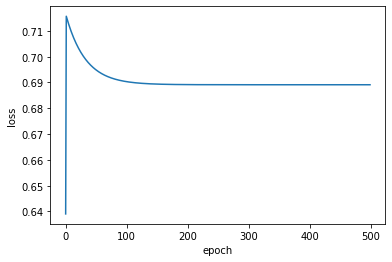

In [ ]:
import torch
from torch.autograd import Variable 
import matplotlib.pyplot as plt

exerciseH_data = [1,2,3,4,5,6,7,8] # 운동시간 데이터
weightchange_data = [1,3,4,8,7,8,9,10] # 몸무게 변화 데이터

w = Variable(torch.Tensor([1.0]), requires_grad=True) # 여기서 1.0은 w의 초기값, requires_grad=True는 w는 gradient를 구해야 함을 알려줌
b = Variable(torch.Tensor([1.0]), requires_grad=True) 

def forward(x): # 주어진 값을 이용하여 얻은 그래프상의 점을 계산
    return x*w + b

def loss(x,y): # 평균 제곱 오차 값을 계산
    y_pred = forward(x) # y_pred는 forward(x)인 x*w+b임
    return (y_pred - y) ** 2 # 제곱을 하는 이유는 부호가 다르고 절대값은 같은 값의 오차 값이 차이 나지 않게 해주기 위함임

lr = 0.01 # 학습률 값을 입력
l_lst = [] # l 데이터 값을 받을 리스트

for epoch in range(500): # 500번 데이터 세트를 확인
    l_sum = 0 # loss의 핪을 초기화
    for x_val, y_val in zip(exerciseH_data, weightchange_data): # zip 내장함수에 운동 시간과 몸무게 변화 값을 묶어줌
        l = loss(x_val, y_val) # loss값 계산
        l.backward() #loss의 backward를 계산(편미분값 저장)
        w.data = w.data - lr * w.grad.data # w.grad.data = loss를 w로 gradient한 값
        b.data = b.data - lr * b.grad.data # b.grad.data = loss를 b로 gradient한 값
        print(f'{x_val}, {y_val}: w={w.data[0]:6.2f}, b={b.data[0]:6.2f}, l/w={w.data[0]:6.2f}, l/b={b.data[0]:6.2f}, l={l.data[0]:6.2f}')
        # 위의 프린트는 for문이 돌아 갈때마다 w, b, l/w, l/b, l을 출력
        l_sum += l.data[0] ** 0.5 # loss값의 합을 계산,l.data = loss의 데이터
        w.grad.data.zero_() # 계속 누적 안시키려고 0으로 최기화
        b.grad.data.zero_() # 안쓰면 오류남
        
    loss_val = l_sum / len(exerciseH_data) #loss_val 도출
    l_lst.append(loss_val) # 모든 loss_val를 l_lst에 저장
    print(f'epoch: {epoch}, w={w.data[0]:0.2f}, b={b.data[0]:0.2f}, loss={loss_val:0.2f}') # epoch, w, b, loss를 출력

print(f'predict (after training) 4 hours: {forward(2).data[0]:0.2f}') # 트레이닝 이후 4시간 예측값
plt.plot(l_lst) # 그래프에 대입
plt.xlabel('epoch') # x축의 이름을 epoch   
plt.ylabel('loss') # y축의 이름을 loss
plt.show() # 그래프 출력
        
        
        